<a href="https://colab.research.google.com/github/Kannikanti-Geethika/OIBSIP-DATA--ANALYTICS/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
             Age  Annual Income (k$)  Spending Score (1-100)
count  10.000000           10.000000               10.000000
mean   34.600000           47.000000               49.900000
std     8.140434           33.206425               35.485365
min    23.000000            3.000000                3.000000
25%    29.500000           21.000000               14.250000
50%    34.000000           39.500000               58.000000
75%    39.250000           76.750000               77.000000
max    48.000000           94.000000               94.000000


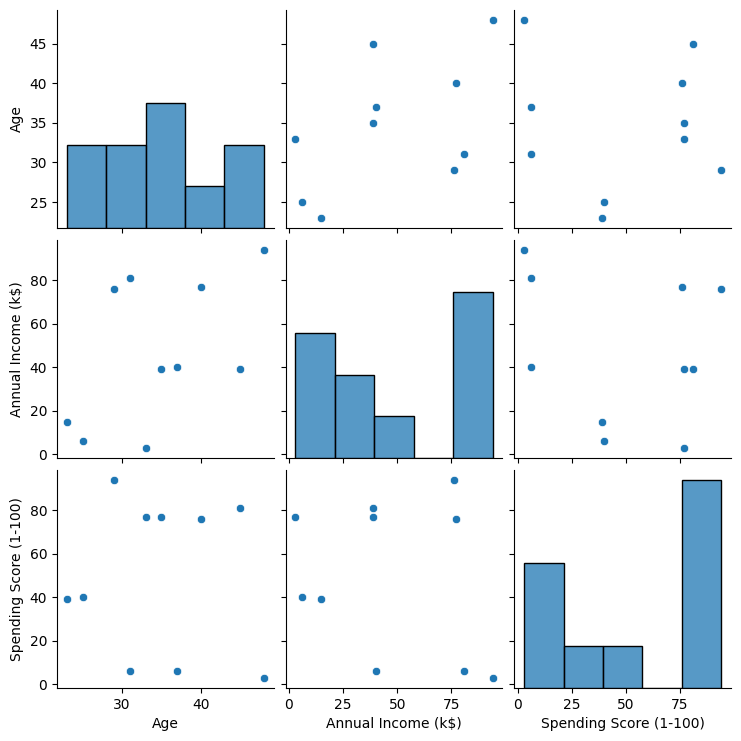

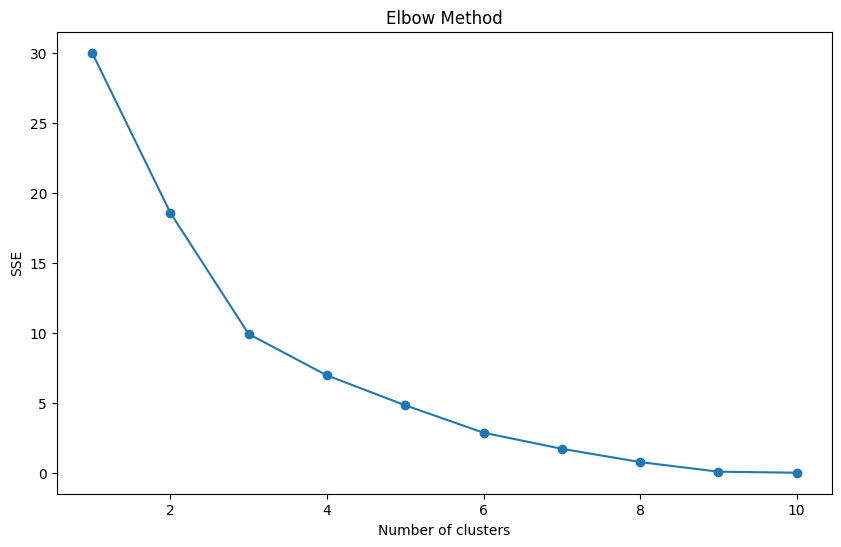

Silhouette Score: 0.35106000770343176


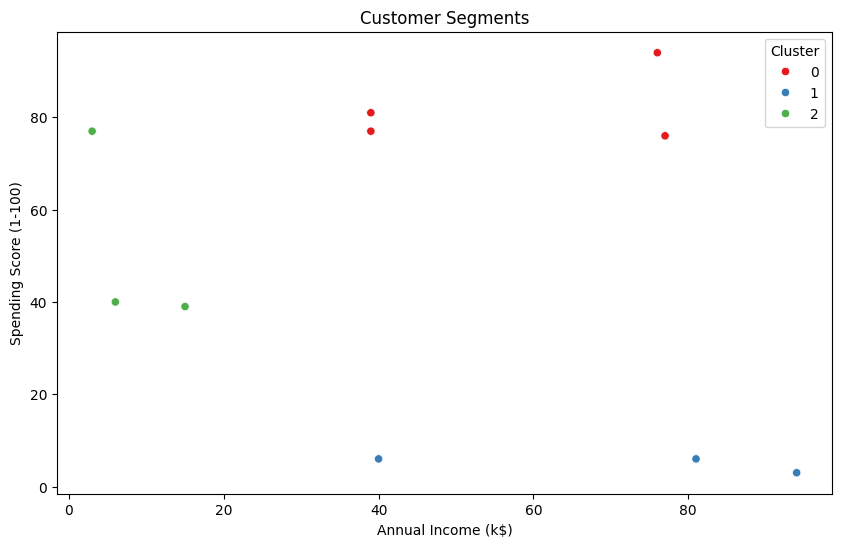

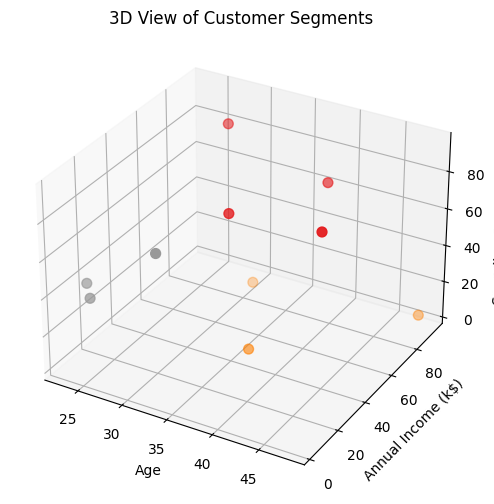

In [1]:
#CUSTOMER SEGMENTATION:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Load Data
# uploaded = files.upload()
# df = pd.read_csv('ecommerce_data.csv')

# For demonstration purposes, let's create a sample dataframe
data = {'CustomerID': range(1, 11),
        'Age': [23, 45, 31, 35, 25, 40, 37, 29, 48, 33],
        'Annual Income (k$)': [15, 39, 81, 39, 6, 77, 40, 76, 94, 3],
        'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 77]}

df = pd.DataFrame(data)

# Step 3: Data Preprocessing
# Dropping the CustomerID column as it is not needed for segmentation
df.drop('CustomerID', axis=1, inplace=True)

# Checking for missing values
print(df.isnull().sum())

# Step 4: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

# Pairplot to understand relationships
sns.pairplot(df)
plt.show()

# Step 5: Feature Engineering
# For simplicity, we are using the existing features (Age, Annual Income, Spending Score)

# Step 6: Clustering using KMeans
# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Finding the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 7: Evaluation
# Silhouette Score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Step 8: Visualization
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

# Additional visualization: 3D plot (if needed)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D View of Customer Segments')
plt.show()